<a href="https://colab.research.google.com/github/TabassumPatel4458/Capstone-Project-3-Classification/blob/main/Individual_Capstone_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    :- Mobile Price Range Prediction.



# **GitHub Link :-**

 https://github.com/TabassumPatel4458

# **Problem Statement :-**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phoneleg - RAM Internal Memory, etc) and its selling price in this problem, we do not have to predict the actual price but a price range indicating how high the price is ?

**AIM :-**
In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile.

# ***Let's Begin ! :-***

## ***1. Know Your Data :-***

First of all, import all required libraries like pandas, matplotlib, etc. These libraries are used to load, preprocess and visualize the dataset.

Then load the training and testing dataset using the read_csv function of the pandas module and store into the separate variable train and test.

### Import Libraries :-

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading :-

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/data_mobile_price_range.csv',encoding='unicode_escape')

## **Dataset First View :-**

In [4]:
# Dataset First Look
df1.head()
     

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count :-

In [5]:
# Dataset Rows & Columns count
df1.shape

(2000, 21)

### Dataset Information :-

In [6]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values :-

In [7]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

#### Missing Values/Null Values :-

In [8]:
# Missing Values/Null Values Count
print(df1.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


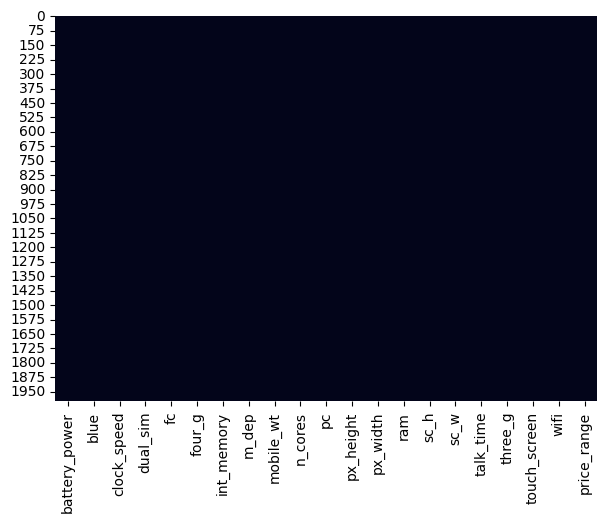

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()
     

### What did you know about your dataset?

answer :- 1.The given dataset from competitive mobile market companies, and we do not have to predict the actual price but a price range indicating how high the price is.

2.Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

3.The above dataset has 2000 rows and 21 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables :-***

In [10]:
# Dataset Columns
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Dataset Describe
df1.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
# Total phones with sc_w = 0
print(len(df1[df1.sc_w == 0]))
# Total phones with px_height = 0
print(len(df1[df1.px_height == 0]))

180
2


In [13]:
#where ther is sc_W and px_height is zero ,assigning mean values
df1['sc_w'][df1[df1.sc_w == 0].index] = df1.sc_w.mean()
df1['px_height'][df1[df1.px_height == 0].index] = df1.px_height.mean()

In [14]:
#checking whether there is duplicates or not
len(df1[df1.duplicated()])

0

In [15]:
#The nunique () method returns the number of unique values for each column
df1.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

there are no duplicate values.

In [16]:
#checking whether there is null values or not
df1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

there are no missing values in the data set.

### Variables Description :-





*   Battery_power : Total energy a battery can store in one time measured in mAh

*   Blue : Has bluetooth or not
*   Clock_speed : speed at which microprocessor executes instructions
*   Dual_sim : Has dual sim support or not
*   Fc : Front Camera mega pixels
*   Four_g : Has 4G or not
*   Int_memory : Internal Memory in Gigabytes
*   M_dep : Mobile Depth in cm
*   Mobile_wt : Weight of mobile phone
*   N_cores : Number of cores of processor
*   Pc : Primary Camera mega pixels
*   Px_height : Pixel Resolution Height
*   Px_width : Pixel Resolution Width
*   Ram : Random Access Memory in Mega
*   Touch_screen : Has touch screen or not
*   Wifi : Has wifi or not
*   Sc_h : Screen Height of mobile in cm
*   Sc_w : Screen Width of mobile in cm
*   Talk_time : longest time that a single battery charge will last when you are
*   Three_g : Has 3G or not
*   Wifi : Has wifi or not
*   Price_range : This is the target variable with value of 0(low cost),      (medium cost),2(high cost) and 3(very high cost).

##Check Unique Values for each variable. :-

In [17]:
# Check Unique Values for each variable.
for i in df1.columns.tolist():
  print("No. of unique values in ",i,"is",df1[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


## 3. ***Data Wrangling :-***

### Data Wrangling Code :-

In [18]:
# Write your code to make your dataset analysis ready.

# Create a copy of the current dataset and assigning to df
df=df1.copy()

# Checking mobile belongs to price range 0
print("No of mobile belongs to price_range 0 is :",len(df[df['price_range']==0]))

# Checking mobile belongs to price range 4
print("No of mobile belongs to price_range 4 is :",len(df[df['price_range']==4]))

# Checking mobile belongs to price range 2
print("No of mobile belongs to price_range 2 is :",len(df[df['price_range']==2]))

# Checking mobile belongs to price range 5
print("No of mobile belongs to price_range 5 is :",len(df[df['price_range']==5]))

No of mobile belongs to price_range 0 is : 500
No of mobile belongs to price_range 4 is : 0
No of mobile belongs to price_range 2 is : 500
No of mobile belongs to price_range 5 is : 0


In [19]:
# show value counts
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [20]:
# Mobile phones groupby 4g support and not supports
df.groupby('four_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=True)

,four_g,price_range,Count
3,0,3,225
2,0,1,238
1,0,0,241
7,1,2,247
0,0,2,253
6,1,0,259
5,1,1,262
4,1,3,275


In [21]:
# Mobile phones groupby 3g support and not supports
df.groupby('three_g')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=True)

,three_g,price_range,Count
3,0,2,113
2,0,3,115
1,0,1,122
0,0,0,127
7,1,0,373
6,1,1,378
5,1,3,385
4,1,2,387


In [22]:
# Mobile phones groupby blue support and not supports
df.groupby('blue')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=True)

,blue,price_range,Count
3,0,3,241
6,1,0,243
7,1,2,243
5,1,1,245
2,0,1,255
0,0,0,257
1,0,2,257
4,1,3,259


In [23]:
# Mobile phones groupby dual sim support and not supports
df.groupby('dual_sim')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,dual_sim,price_range,Count
4,1,3,265
5,1,1,255
0,0,2,251
1,0,0,250
6,1,0,250
7,1,2,249
2,0,1,245
3,0,3,235


In [24]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,touch_screen,price_range,Count
0,0,2,265
4,1,0,262
5,1,1,261
1,0,3,252
6,1,3,248
2,0,1,239
3,0,0,238
7,1,2,235


In [25]:
# Pixels count
df['px_count'] = df['px_width']*df['px_height']

In [26]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=True)

,touch_screen,price_range,Count
7,1,2,235
3,0,0,238
2,0,1,239
6,1,3,248
1,0,3,252
5,1,1,261
4,1,0,262
0,0,2,265


In [27]:
# show price range with descreasing pixel count values
df.sort_values(["px_count"],ascending=True)[ ['price_range', 'px_count'] ].head(20)

,price_range,px_count
801,0,926.0
1536,1,1320.0
1963,1,1887.0
73,3,2552.0
1991,3,2972.0
468,0,4758.0
1314,0,4986.0
1878,1,5404.0
786,3,7168.0
1146,2,7875.0


In [28]:
# Write your code to make your dataset analysis ready.
data_num = df1[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

data_cat = df1[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [29]:
data_cat


,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


In [30]:
data_num

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20.0,756,2549,9,7.0,19
1,1021,0.5,0,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7
2,563,0.5,2,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9
3,615,2.5,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11
4,1821,1.2,13,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222.0,1890,668,13,4.0,19
1996,1965,2.6,0,39,0.2,187,4,3,915.0,1965,2032,11,10.0,16
1997,1911,0.9,1,36,0.7,108,8,3,868.0,1632,3057,9,1.0,5
1998,1512,0.9,4,46,0.1,145,5,5,336.0,670,869,18,10.0,19


### What all manipulations have you done and insights you found?

answer :- The dependent variable are 4 types of unique variable and all 4 same length of value are their.

# **Conclusion :-**

1. From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.

2. half the devices have Bluetooth, and half don’t

3. there is a gradual increase in battery as the price range increases

4. RAM has continuous increase with price range while moving from Low cost to Very high cost.

5. costly phones are lighter.

6. RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

7. form all the above experiments we can conclude that XGboosting and linear regression with using hyperparameters we got the best results.